In [1]:
# Name:SRIRAM GOPALAN G
# TASK 4:SENTIMENT ANALYSIS

In [2]:
# Task 4- SENTIMENT ANALYSIS for IMDB Dataset

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Download NLTK stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sriram\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [5]:
# Load the IMDb Dataset
file_path = "IMDB.csv"
data = pd.read_csv(file_path)

In [6]:
# Display dataset structure
print("Dataset Overview:")
print(data.head())

Dataset Overview:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [7]:
# Data Preprocessing
# Convert to lowercase
data['review'] = data['review'].str.lower()

In [8]:
# Remove stopwords
stop_words = set(stopwords.words('english'))

In [9]:
def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in stop_words])
data['cleaned_review'] = data['review'].apply(remove_stopwords)

In [10]:
# Vectorization (Convert Text to Numerical Features)
# Use TfidfVectorizer to create features
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['cleaned_review']).toarray()
y = data['sentiment'].apply(lambda x: 1 if x == "positive" else 0)  # Encode labels

In [11]:
# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Step 5: Model Implementation (Naive Bayes Classifier)
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [13]:
# Step 6: Evaluate the Model
y_pred = model.predict(X_test)

In [14]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 85.42%


In [15]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      4961
           1       0.85      0.86      0.86      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



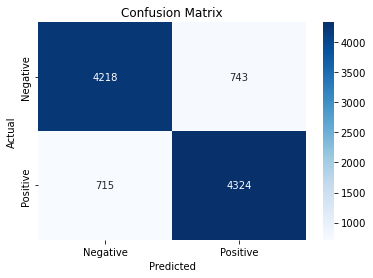

In [16]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

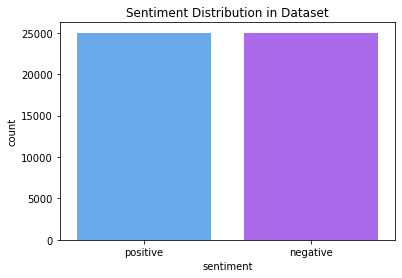

In [17]:
# Step 7: Insights and Visualization
# Distribution of Sentiments
sns.countplot(data=data, x='sentiment', palette='cool')
plt.title("Sentiment Distribution in Dataset")
plt.show()

In [18]:
# Top 20 Words (Positive vs Negative)
positive_reviews = data[data['sentiment'] == "positive"]['cleaned_review']
negative_reviews = data[data['sentiment'] == "negative"]['cleaned_review']

In [19]:
positive_vectorizer = CountVectorizer(max_features=20)
negative_vectorizer = CountVectorizer(max_features=20)

positive_counts = positive_vectorizer.fit_transform(positive_reviews).sum(axis=0).A1
negative_counts = negative_vectorizer.fit_transform(negative_reviews).sum(axis=0).A1

positive_words = positive_vectorizer.get_feature_names_out()
negative_words = negative_vectorizer.get_feature_names_out()

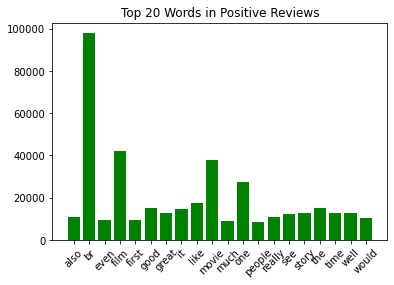

In [20]:
plt.bar(positive_words, positive_counts, color='green')
plt.title("Top 20 Words in Positive Reviews")
plt.xticks(rotation=45)
plt.show()

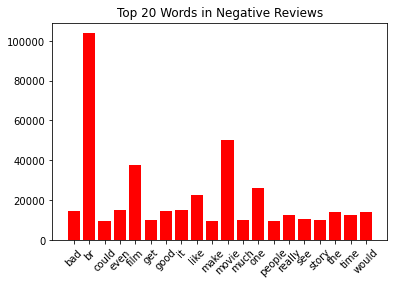

In [21]:
plt.bar(negative_words, negative_counts, color='red')
plt.title("Top 20 Words in Negative Reviews")
plt.xticks(rotation=45)
plt.show()